In [5]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import random

In [6]:
def independent_t_test(sample1, sample2, tail, alpha):
    n1, mean1, std1 = len(sample1), np.mean(sample1), np.std(sample1, ddof = 1)
    n2, mean2, std2 = len(sample2), np.mean(sample2), np.std(sample2, ddof = 1)
    t = (mean1 - mean2)/np.sqrt(std1**2/n1 + std2**2/n2)
    df = n1 + n2 - 2
    area = alpha/2 if tail == 'two' else alpha
    critical = abs(stats.t.ppf(area, df))
    
    print("Critical Value =",critical)
    print("T Statistic =",t)
    if abs(t) > abs(critical):
        print("Reject Null Hypothesis")
    else:
        print("Accept Null Hypothesis")

    x = np.linspace(-4, 4, 1000)
    y = stats.t.pdf(x, df)

    plt.figure(figsize = (10, 6))
    plt.plot(x, y, color = 'blue', label = 'T Distribution Curve')
    plt.axvline(t, color = 'green', linestyle = '--', label = 'T Statistic')
    
    if tail == 'left':where = x < -critical
    elif tail == 'right':where = x > critical
    else:where = abs(x) > critical
        
    plt.fill_between(x, y, where = where, color = 'red', alpha = 0.5, label = 'Critical Region')
    plt.xlabel('T Score')
    plt.ylabel('Probability Distribution')
    plt.title('Independent Two Sample T Test')
    plt.legend()
    plt.show()

<b> Implement Random Sampling, Demonstrate T-test. Is there a significant difference in cholesterol levels between patients with heart disease and those without? (Significance value = 0.01) </b>

In [7]:
df = pd.read_csv('1_heart.csv')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Critical Value = 2.428567630859086
T Statistic = -0.9262771930705933
Accept Null Hypothesis


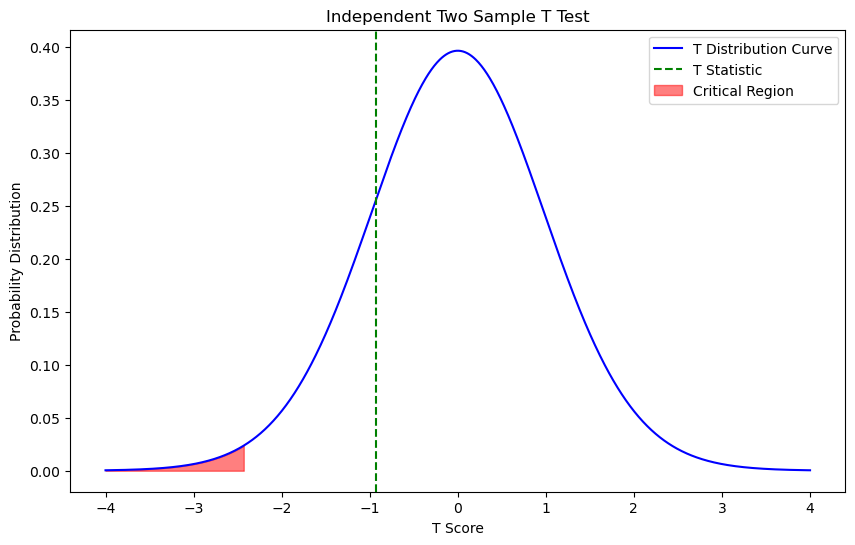

Critical Value = 2.711557601913063
T Statistic = -0.9262771930705933
Accept Null Hypothesis


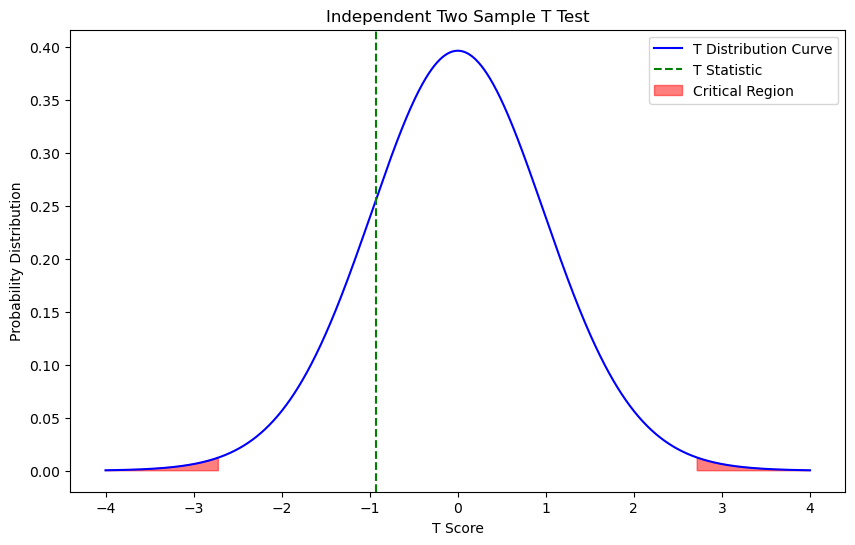

Critical Value = 2.428567630859086
T Statistic = -0.9262771930705933
Accept Null Hypothesis


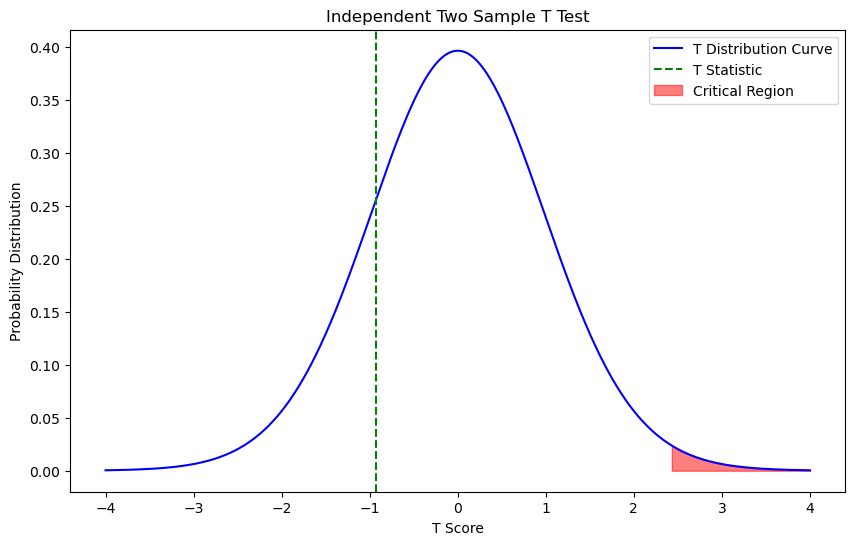

In [8]:
data = df[['chol', 'target']]
with_heart_disease = data[data['target'] == 1]['chol'].to_list()
without_heart_disease = data[data['target'] == 0]['chol'].to_list()

sample1 = random.choices(with_heart_disease, k = 20)
sample2 = random.choices(without_heart_disease, k = 20)
alpha = 0.01
independent_t_test(sample1, sample2, 'left', alpha)
independent_t_test(sample1, sample2, 'two', alpha)
independent_t_test(sample1, sample2, 'right', alpha)